<a href="https://colab.research.google.com/github/niconielsen32/NeuralNetworks/blob/main/YOLOv8CustomObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Sat Jan 14 13:46:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=4a8398a9a951b64b3c5c6e1a7b9af3f6e8124505bdab08e908c7e6d389d954f6
  Stored in directory: /root/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Success

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/166.8 GB disk)


## Inference Example with Pretrained YOLOv8 Model

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 104k/104k [00:00<00:00, 64.9MB/s]
Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
100% 6.24M/6.24M [00:00<00:00, 27.7MB/s]

Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 13.5ms
Speed: 0.4ms pre-process, 13.5ms inference, 16.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


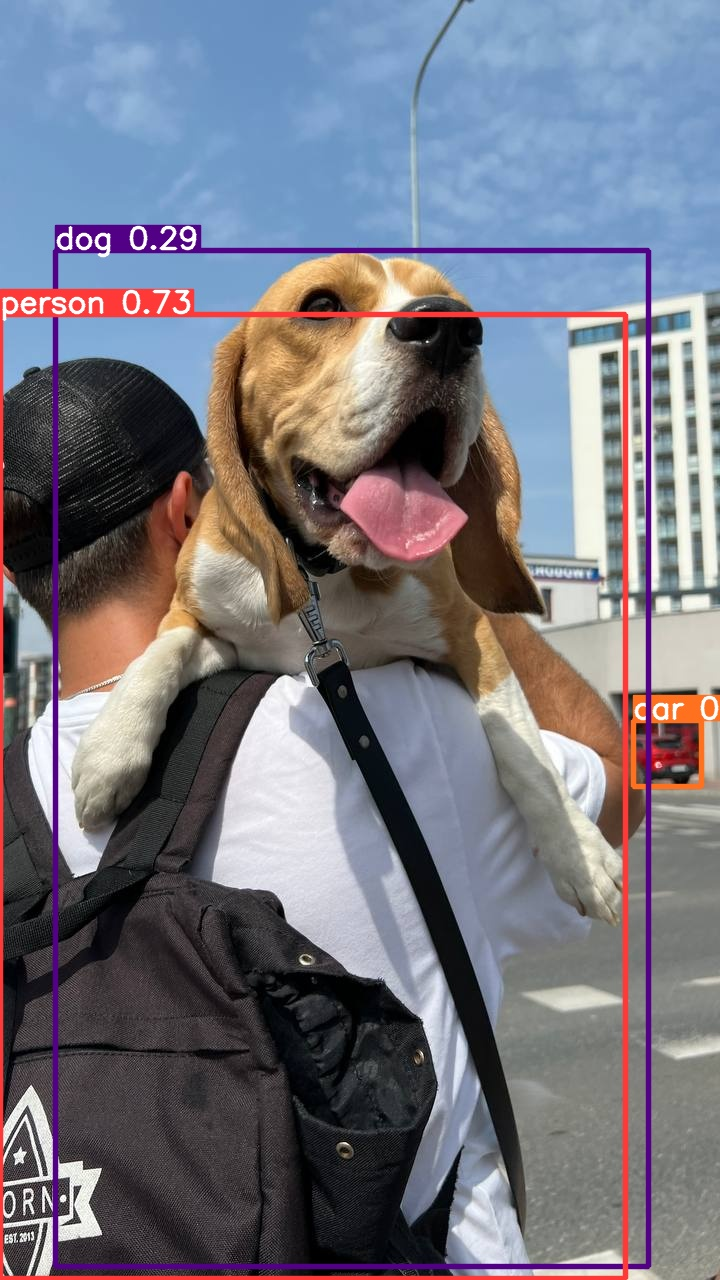

In [ ]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Owb7wL0INQDuAuAz9gth")
project = rf.workspace("nicolai-hoirup-nielsen").project("cup-detection-v2")
dataset = project.version(3).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 16.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cup-Detection-v2-3 in yolov8:: 100%|██████████| 730/730 [00:00<00:00, 2502.75it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:09<00:00, 5.73MB/s]

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Cup-Detection-v2-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

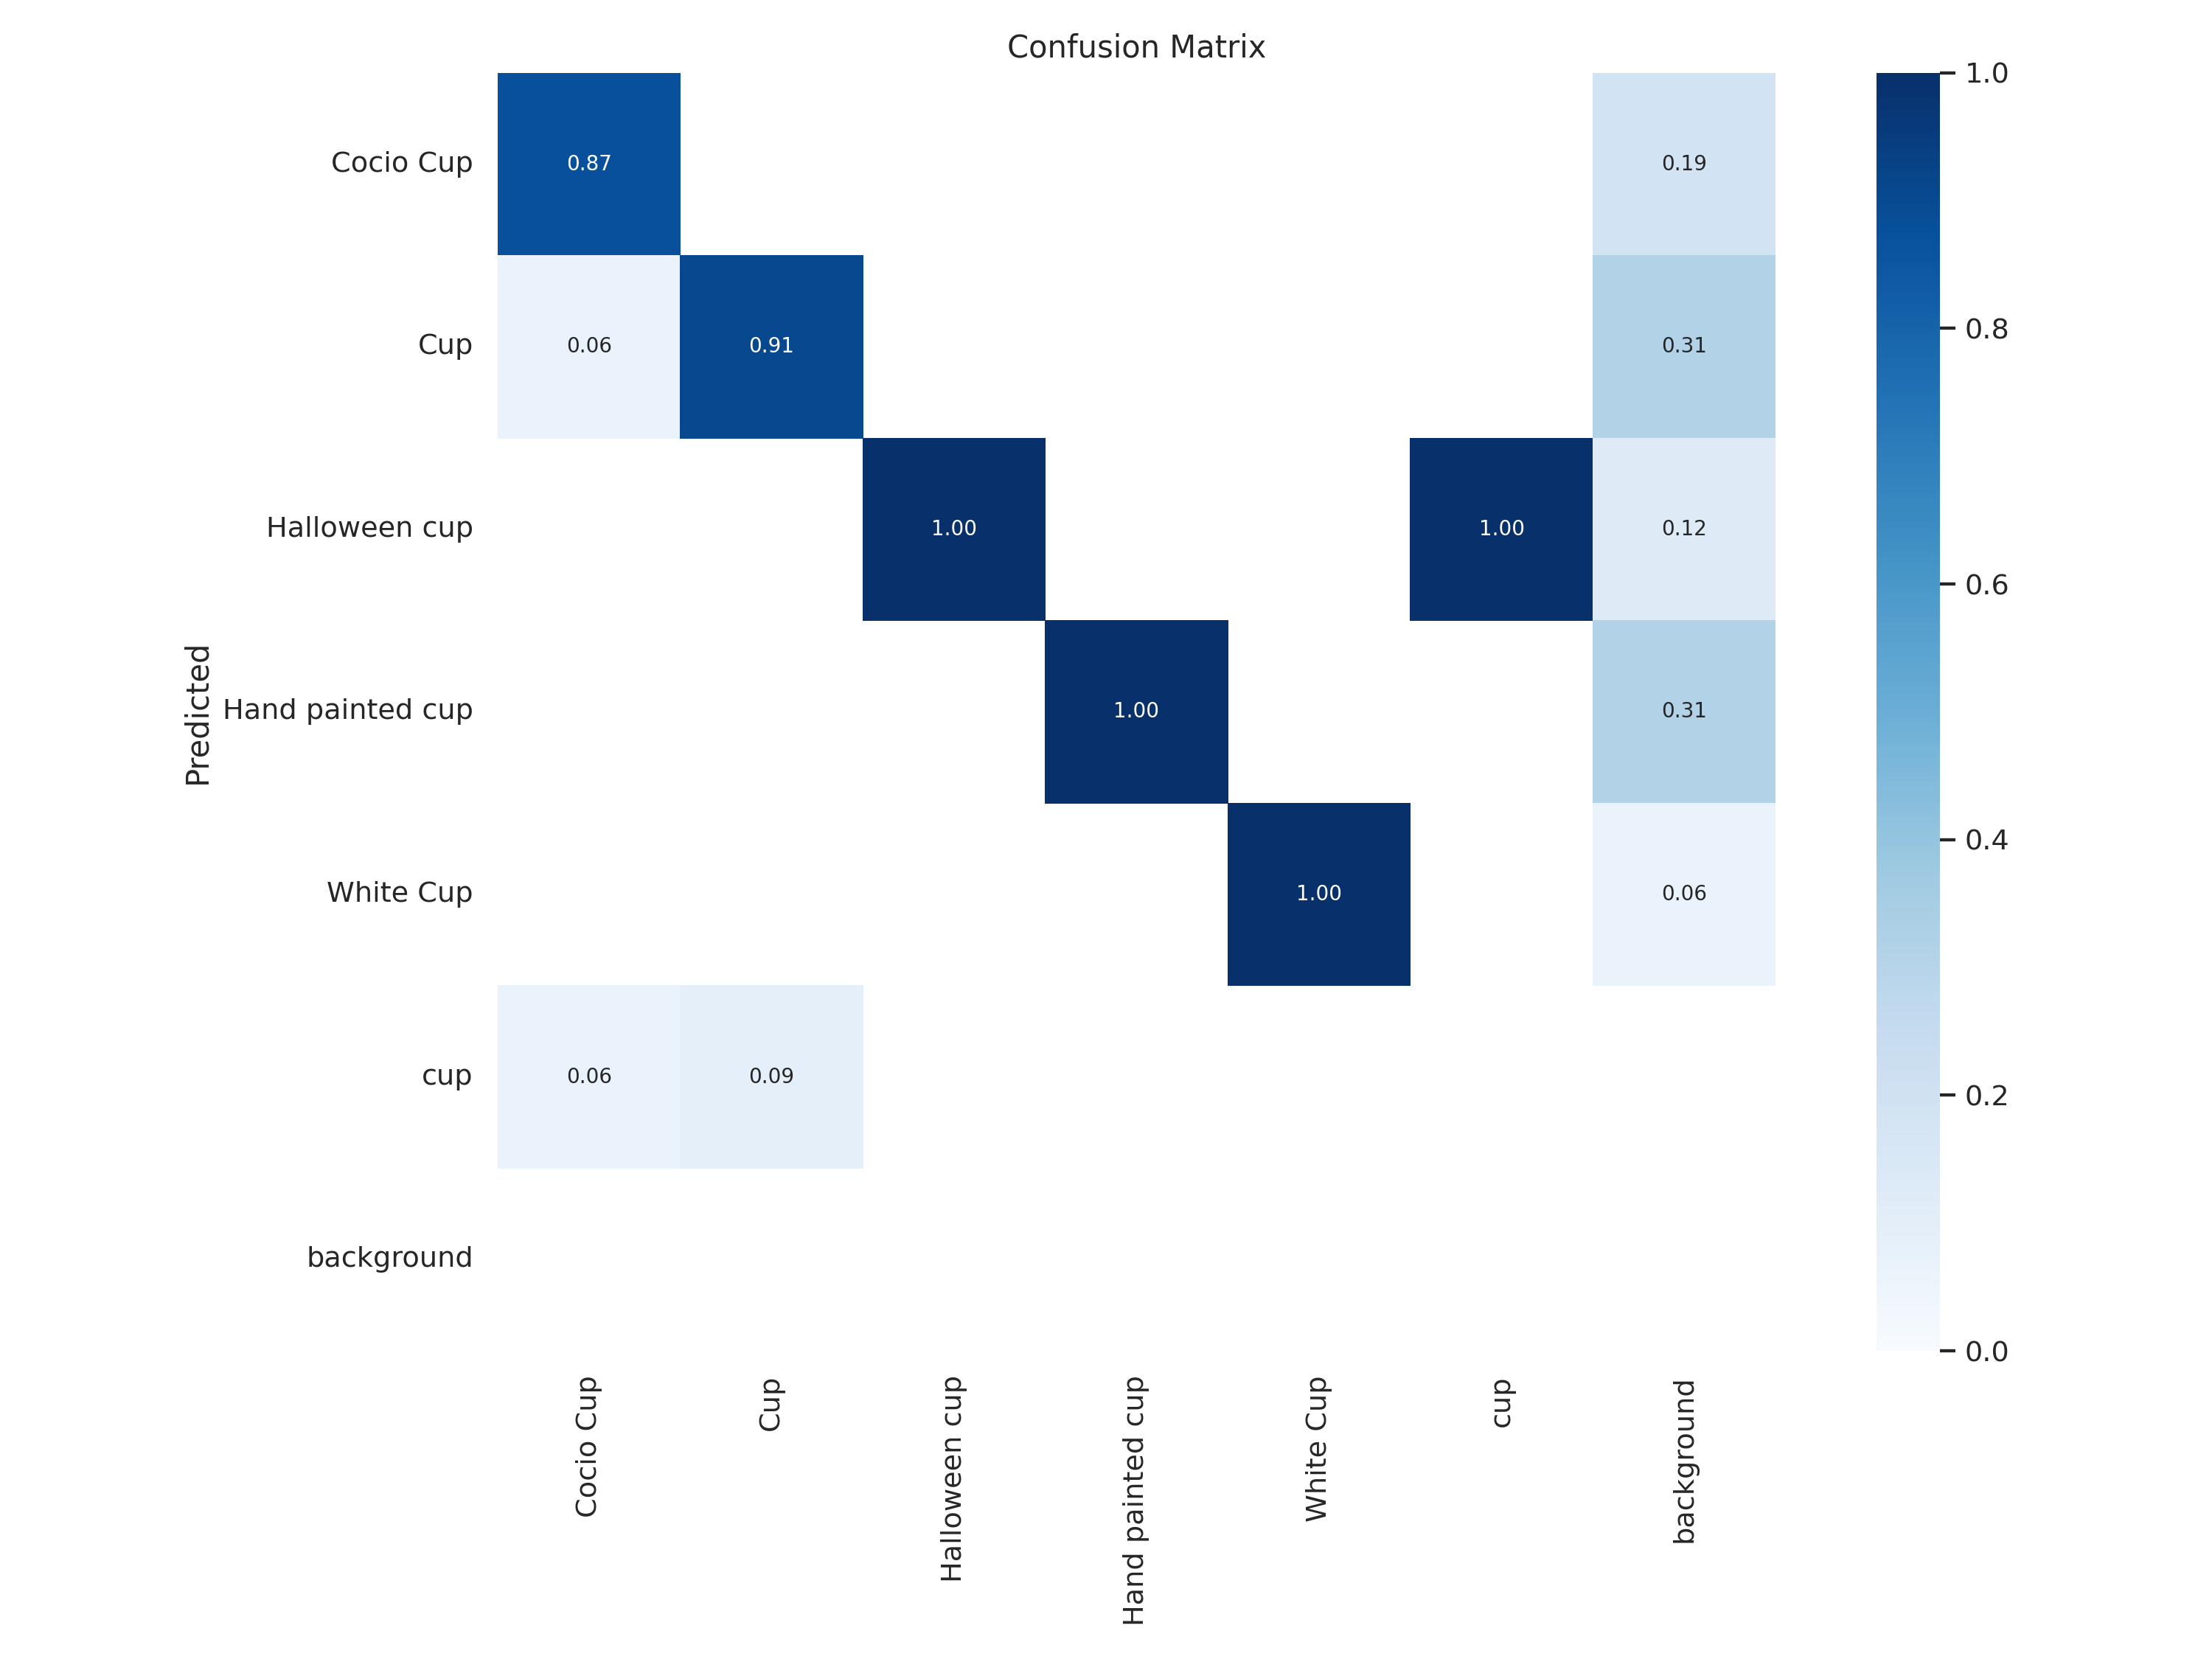

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

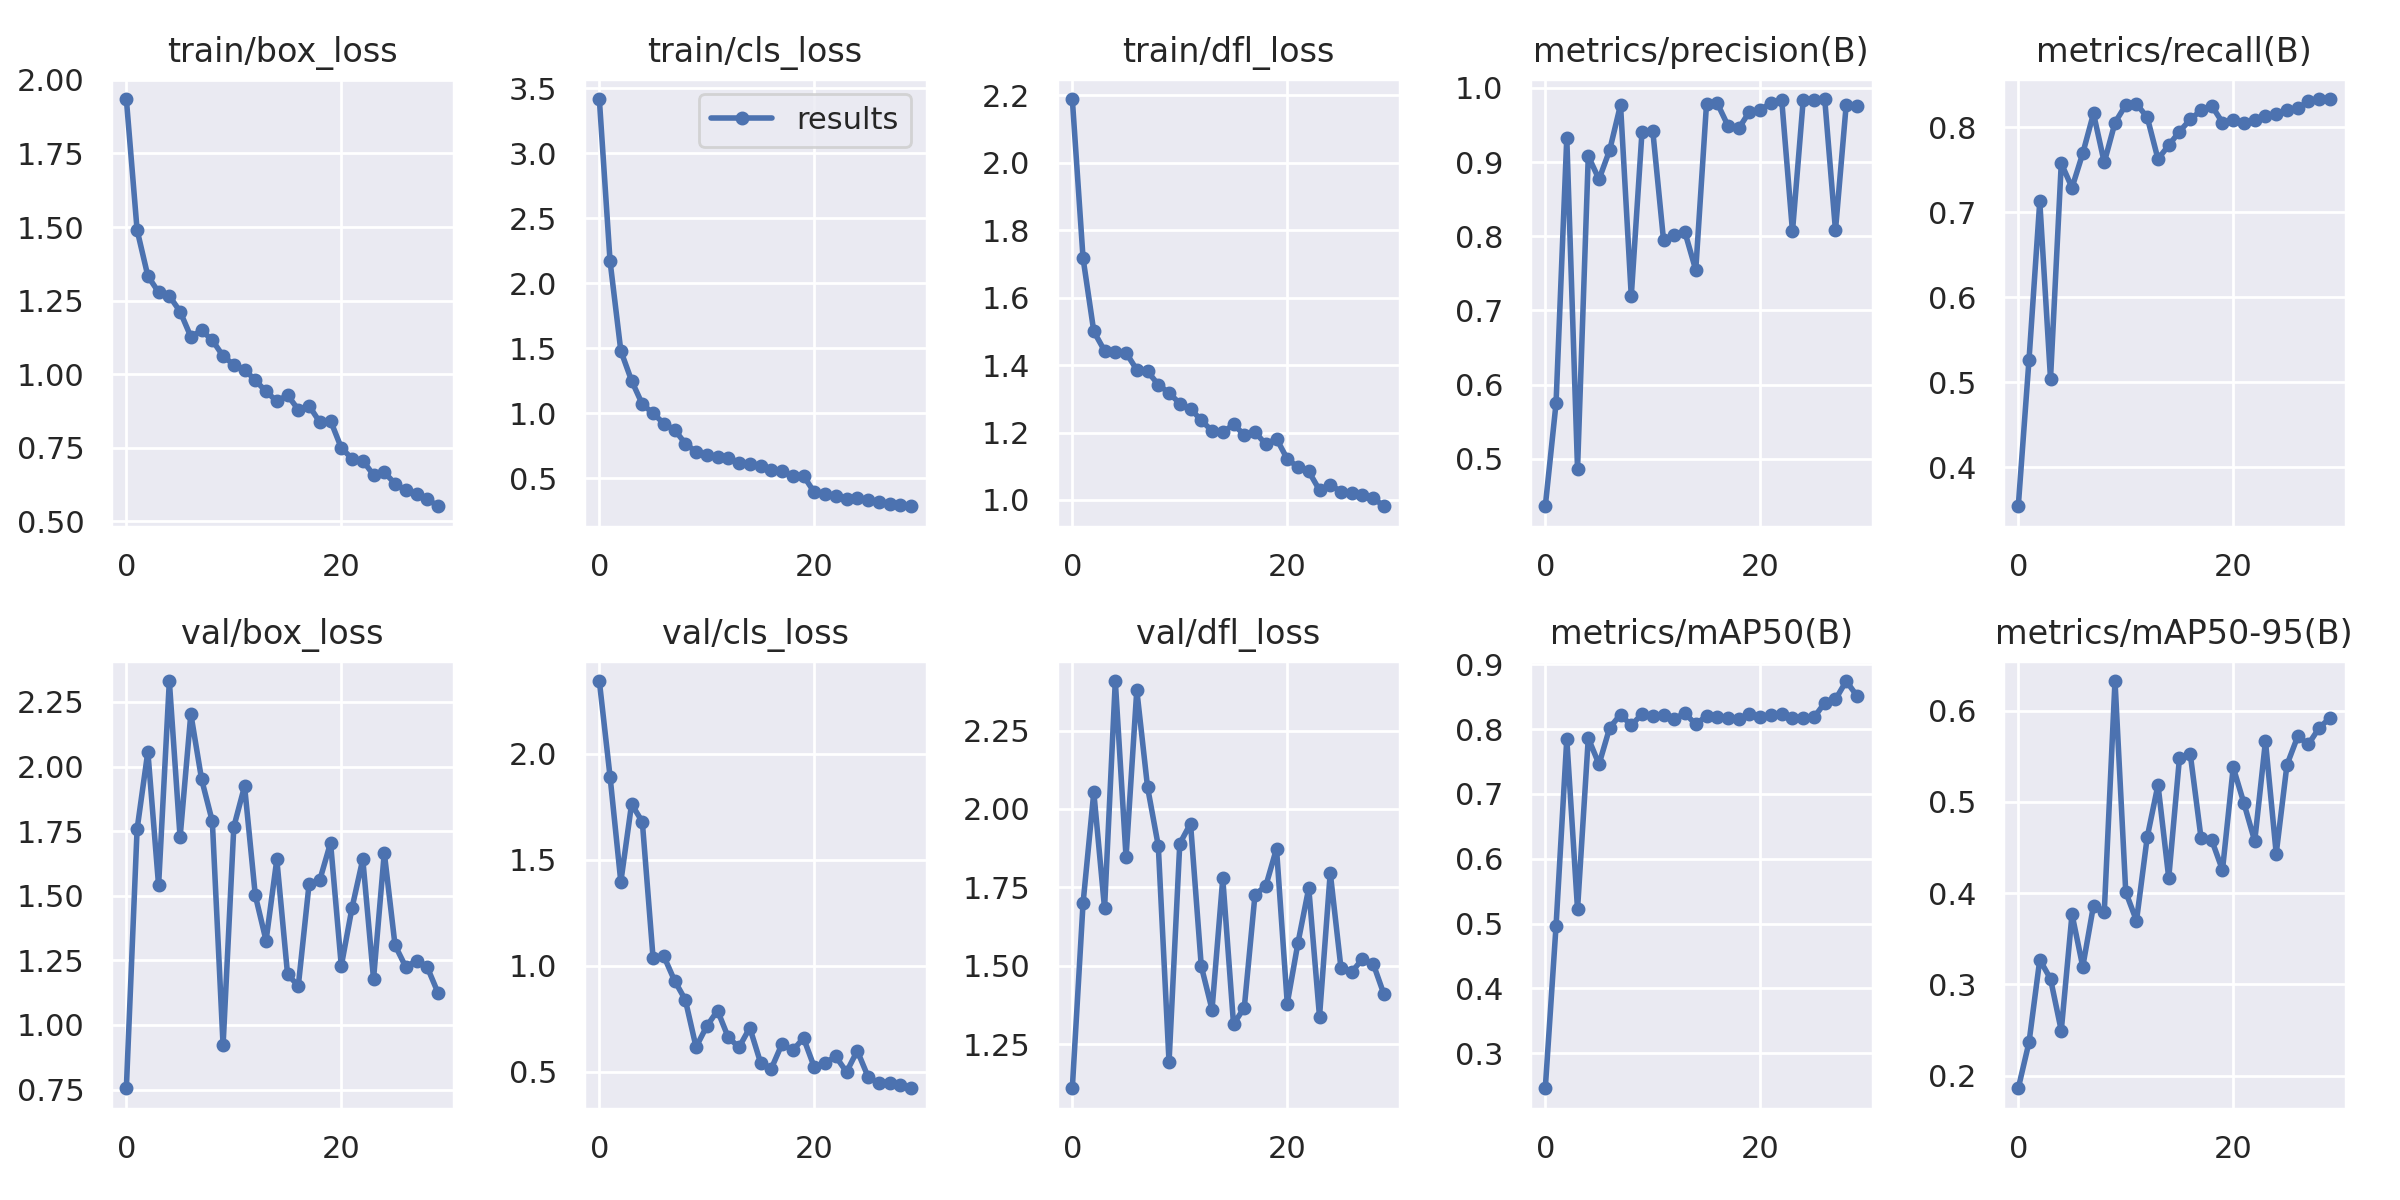

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50% 1/2 [00:00<00:00,  1.18it/s]Exception in thread Thread-3:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/utils/plotting.py", line 250, in plot_images
    annotator.box_label(box, label, color=color)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/utils/plotting.py", line 63, in box_label
    _, _, w, h = self.font.getbbox(label)  # text 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
image 1/10 /content/Cup-Detection-v2-3/test/images/img10_png.rf.1fd0fcc2f6a23a301d61081cc2d4073a.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 38.1ms
image 2/10 /content/Cup-Detection-v2-3/test/images/img1_png.rf.5daff3e408e1fd5975496a089b6d8229.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 38.2ms
image 3/10 /content/Cup-Detection-v2-3/test/images/img34_png.rf.bda5b0247fd2b04401cd4bf31084c623.jpg: 640x640 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 38.1ms
image 4/10 /content/Cup-Detection-v2-3/test/images/img43_png.rf.7760ddd4d75dc1bdda41cefd09cd3ffb.jpg: 640x640 1 Cocio Cup, 2 Cups, 1 Halloween cup, 2 Hand painted cups, 1 White Cup, 36.1ms
image 5/10 /content/Cup-Detection-v2-3/test/images/img59_png.rf.5fd0f9c99e67da7dc735600

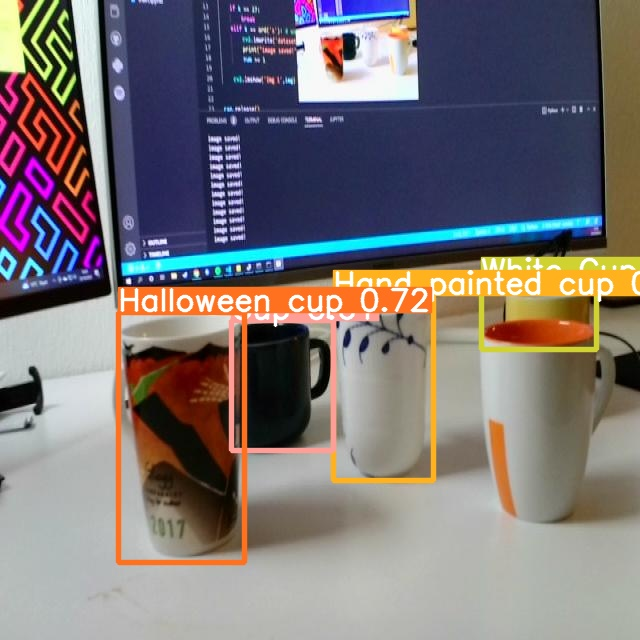

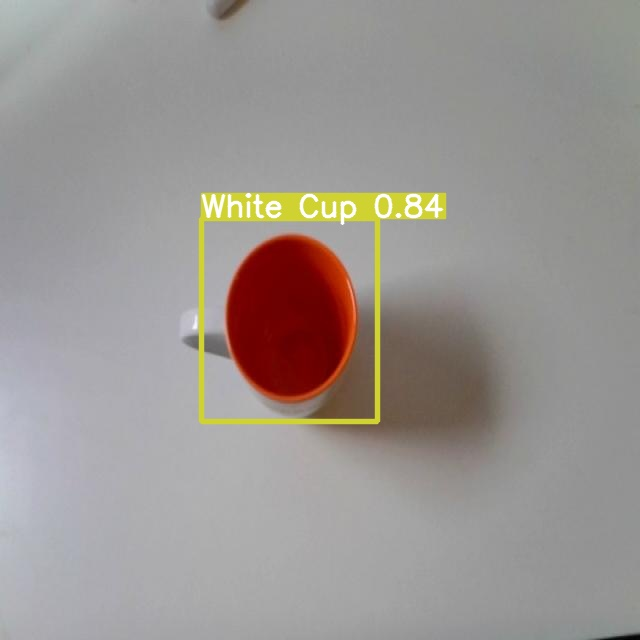

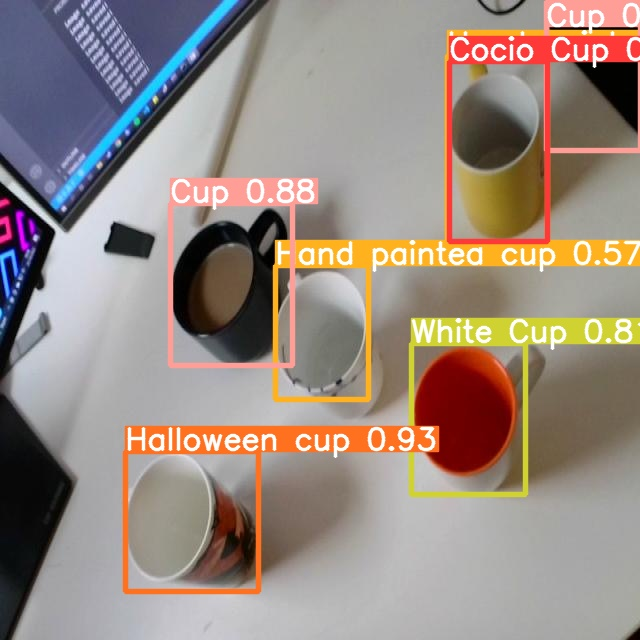

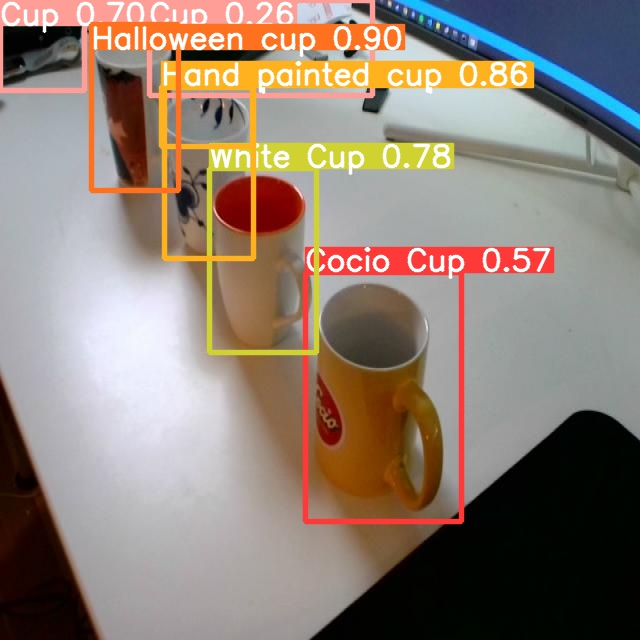

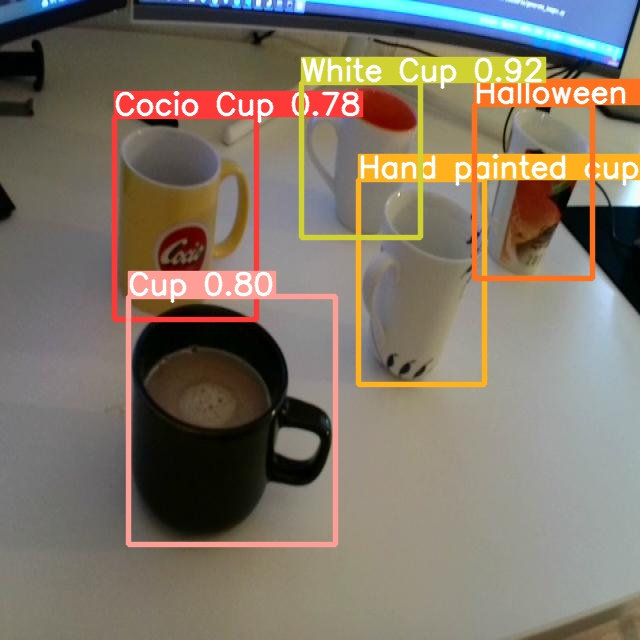

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")